In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Conv2D, MaxPool2D
from pathlib import Path
from tqdm import tqdm
from time import perf_counter
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [ ]:
dir_ = Path('/content/drive/MyDrive/dataset')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기 
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(filepaths)
df.head(10)

,Filepath,Label
0,/content/drive/MyDrive/dataset/brown avocado/b...,brown avocado
1,/content/drive/MyDrive/dataset/brown avocado/r...,brown avocado
2,/content/drive/MyDrive/dataset/bright green av...,bright green avocado
3,/content/drive/MyDrive/dataset/brown avocado/r...,brown avocado
4,/content/drive/MyDrive/dataset/bright green av...,bright green avocado
5,/content/drive/MyDrive/dataset/brown avocado/b...,brown avocado
6,/content/drive/MyDrive/dataset/bright green av...,bright green avocado
7,/content/drive/MyDrive/dataset/bright green av...,bright green avocado
8,/content/drive/MyDrive/dataset/brown avocado/r...,brown avocado
9,/content/drive/MyDrive/dataset/brown avocado/b...,brown avocado


In [ ]:
# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((1125, 2), (126, 2))

In [ ]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)
train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='validation')

Found 1002 images belonging to 2 classes.
Found 249 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
        horizontal_flip=True,   # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
        width_shift_range=0.1,  # 전체 크기의 10% 범위에서 좌우로 이동합니다.
        height_shift_range=0.1, # 마찬가지로 위, 아래로 이동합니다.
        rotation_range=5,
        shear_range=0.7,
        zoom_range=[0.9, 2.2],
        vertical_flip=True,
        fill_mode='nearest') 
batch_size = 5
train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='training')

Found 1251 images belonging to 2 classes.


batch=0


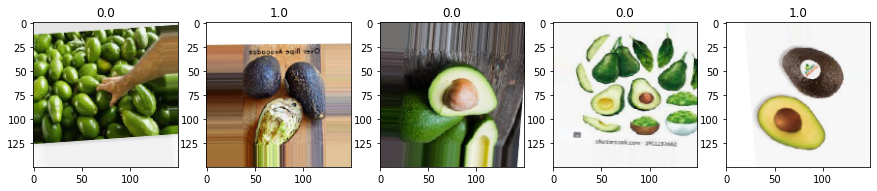

batch=1


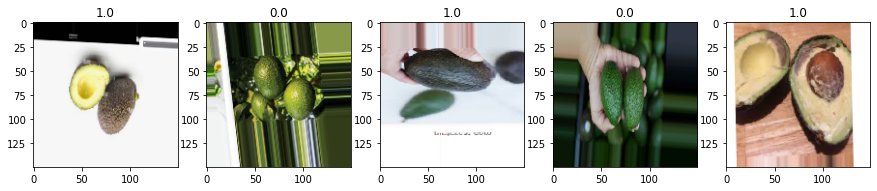

batch=2


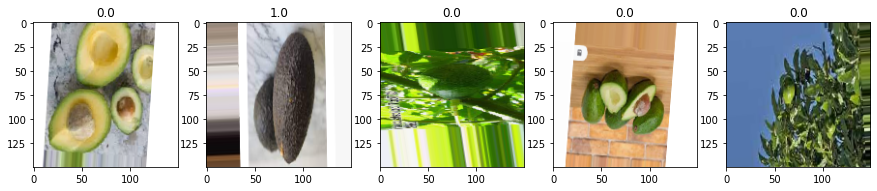

batch=3


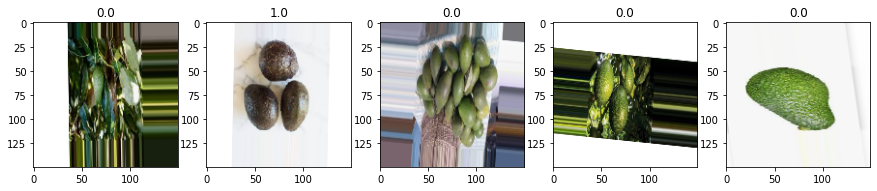

batch=4


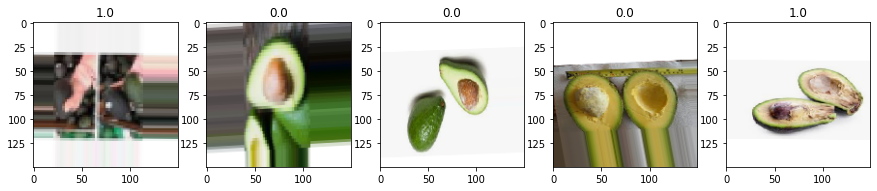

batch=5


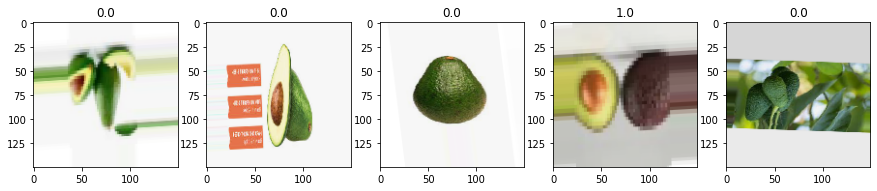

batch=6


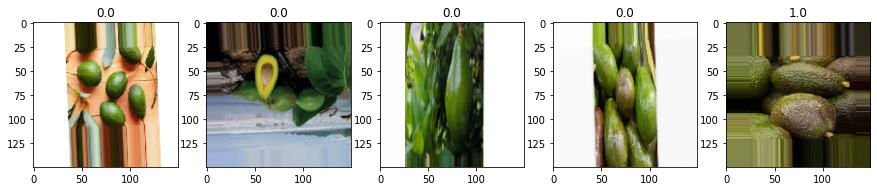

batch=7


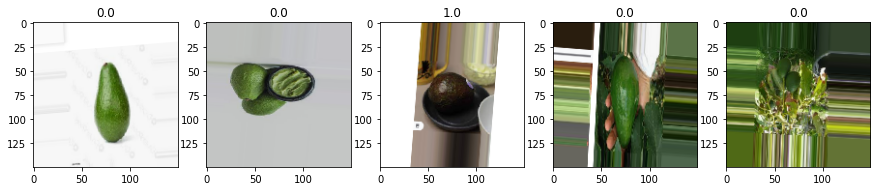

batch=8


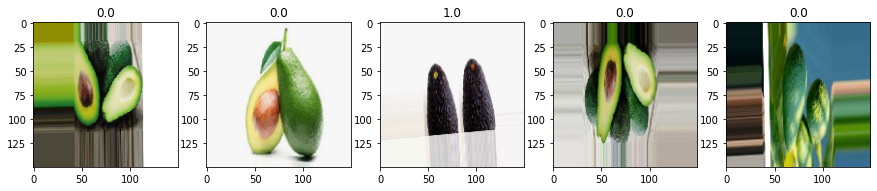

batch=9


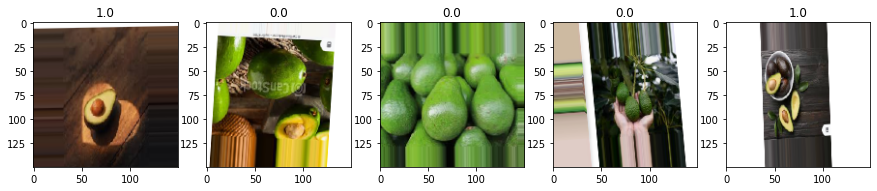

In [ ]:
for i, (img, label) in enumerate(train_gen): # 하나의 batch만큼 generate됨
    print(f"batch={i}")
    plt.figure(figsize=(15, 15))
    for j in range(batch_size):  # 한 epoch에서 생성된 batch개의 이미지 show
        plt.subplot(1, batch_size, j+1)
        plt.title(label[j])
        plt.imshow(img[j])
        ### 생성된 이미지 저장하기
#         im = Image.fromarray((img[j]*255).round().astype(np.uint8))
#         im.save(path+f"new_img{i}-{j}-label{int(label[j])}.jpg")
    plt.show()
    if i >= 9:  # 0~9까지 총 10개 라인 (10x5=50개 data)
        break

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

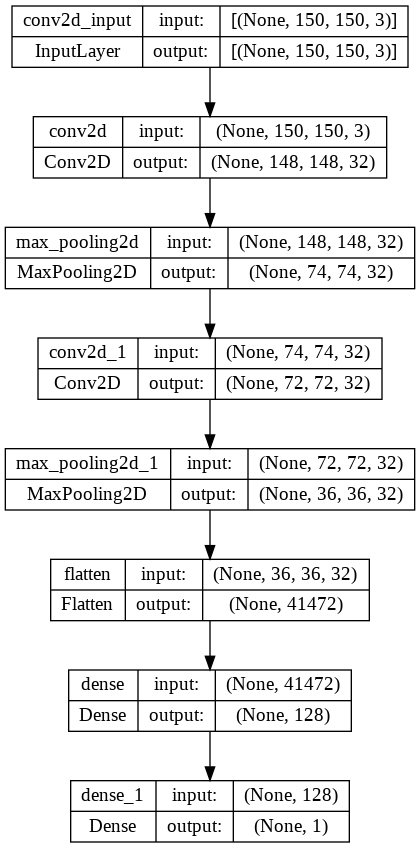

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

%matplotlib inline

plot_model(cnn, to_file='model_shapes.png', show_shapes=True)

In [ ]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='binary', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='binary',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='binary',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0}
    }
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    # 라벨 개수가 8개이기 때문에 Dencs도 8로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)


    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train모델 학습
for name, model in models.items():
    
    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m
    
    start = perf_counter()
    
    # 모델 학습
    Dens_history =  m.fit(train_images,
                    batch_size = 16, 
                    epochs=50,
                    verbose = 1,
                    validation_data=val_images)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")
    
    val_acc =  Dens_history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 1013 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Found 126 validated image filenames belonging to 2 classes.


Epoch 1/50
32/32 [==============================] - 15s 251ms/step - loss: 0.7472 - accuracy: 0.5765 - val_loss: 0.6026 - val_accuracy: 0.7232
Epoch 2/50
32/32 [==============================] - 6s 177ms/step - loss: 0.4912 - accuracy: 0.8608 - val_loss: 0.4335 - val_accuracy: 0.8661
Epoch 3/50
32/32 [==============================] - 6s 178ms/step - loss: 0.3432 - accuracy: 0.9023 - val_loss: 0.3278 - val_accuracy: 0.8661
Epoch 4/50
32/32 [==============================] - 6s 175ms/step - loss: 0.2649 - accuracy: 0.9200 - val_loss: 0.2797 - val_accuracy: 0.8839
Epoch 5/50
32/32 [==============================] - 7s 210ms/step - loss: 0.2194 - accuracy: 0.9299 - val_loss: 0.2469 - val_accuracy: 0.8839
Epoch 6/50
32/32 [==============================] - 6s 179ms/step - loss: 0.1877 - accuracy: 0.9408 - val_

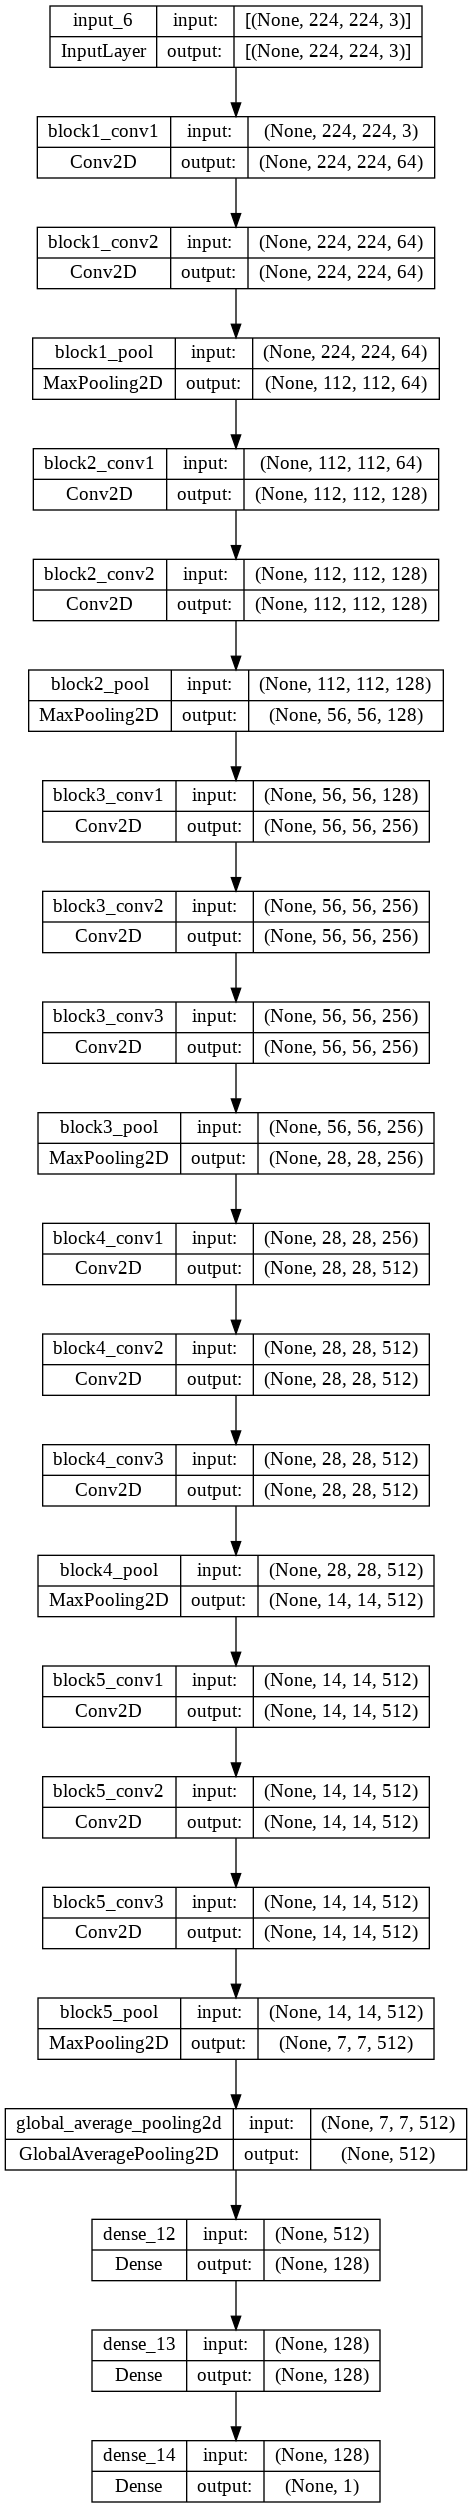

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

%matplotlib inline

plot_model(m, to_file='model_shapes.png', show_shapes=True)

In [ ]:
models = {
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0}
    }
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train모델 학습
for name, model in models.items():
    
    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m
    
    start = perf_counter()
    
    # 모델 학습
    Res_history = m.fit(train_images,
                    batch_size = 16, 
                    epochs=20,
                    verbose = 1,
                    validation_data=val_images)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")
    
    val_acc =  Res_history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 1013 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Found 126 validated image filenames belonging to 2 classes.


Epoch 1/20
32/32 [==============================] - 12s 240ms/step - loss: 0.5281 - accuracy: 0.7433 - val_loss: 0.4699 - val_accuracy: 0.7946
Epoch 2/20
32/32 [==============================] - 5s 168ms/step - loss: 0.3501 - accuracy: 0.8736 - val_loss: 0.4071 - val_accuracy: 0.8482
Epoch 3/20
32/32 [==============================] - 5s 167ms/step - loss: 0.2743 - accuracy: 0.9052 - val_loss: 0.3855 - val_accuracy: 0.8393
Epoch 4/20
32/32 [==============================] - 5s 168ms/step - loss: 0.2306 - accuracy: 0.9181 - val_loss: 0.3628 - val_accuracy: 0.8393
Epoch 5/20
32/32 [==============================] - 5s 168ms/step - loss: 0.1933 - accuracy: 0.9398 - val_loss: 0.3517 - val_accuracy: 0.8750
Epoch 6/20
32/32 [==============================] - 5s 168ms/step - loss: 0.1647 - accuracy: 0.9526 - val_

In [ ]:
models = {
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0}
    }
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    # 라벨 개수가 8개이기 때문에 Dencs도 8로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train모델 학습
for name, model in models.items():
    
    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m
    
    start = perf_counter()
    
     # 모델 학습
    VGG_history = m.fit(train_images,
                    batch_size = 16, 
                    epochs=20,
                    verbose = 1,
                    validation_data=val_images)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")
    
    val_acc = VGG_history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 1013 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Found 126 validated image filenames belonging to 2 classes.


58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/20
32/32 [==============================] - 13s 307ms/step - loss: 0.6866 - accuracy: 0.5656 - val_loss: 0.6559 - val_accuracy: 0.5714
Epoch 2/20
32/32 [==============================] - 6s 183ms/step - loss: 0.6475 - accuracy: 0.7127 - val_loss: 0.6155 - val_accuracy: 0.7946
Epoch 3/20
32/32 [==============================] - 6s 186ms/step - loss: 0.6118 - accuracy: 0.7799 - val_loss: 0.5798 - val_accuracy: 0.8125
Epoch 4/20
32/32 [==============================] - 6s 186ms/step - loss: 0.5752 - accuracy: 0.7808 - val_loss: 0.5462 - val_accuracy: 0.7411
Epoch 5/20
32/32 [==============================] - 6s 186ms/step - loss: 0.5411 - accuracy: 0.8026 - val_loss: 0.5004 - val_accuracy: 0.8571
Epoch 6/20
32/32 [=======================

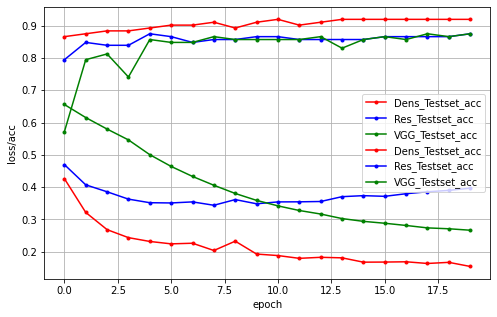

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
Dens_acc= Dens_history.history['val_accuracy']
Res_acc= Res_history.history['val_accuracy']
VGG_acc= VGG_history.history['val_accuracy']
Dens_y_loss = Dens_history.history['val_loss']
Res_y_loss = Res_history.history['val_loss']
VGG_y_loss = VGG_history.history['val_loss']

Dens_x_len = np.arange(len(Dens_y_loss))  
Res_x_len = np.arange(len(Res_y_loss))  
VGG_x_len = np.arange(len(VGG_y_loss))  

plt.figure(figsize=(8, 5))
plt.plot(Dens_x_len, Dens_acc, marker='.', c="red", label='Dens_Testset_acc')
plt.plot(Res_x_len, Res_acc, marker='.', c="blue", label='Res_Testset_acc')
plt.plot(VGG_x_len, VGG_acc, marker='.', c="green", label='VGG_Testset_acc')
plt.plot(Dens_x_len, Dens_y_loss, marker='.', c="red", label='Dens_Testset_acc')
plt.plot(Res_x_len, Res_y_loss, marker='.', c="blue", label='Res_Testset_acc')
plt.plot(VGG_x_len, VGG_y_loss, marker='.', c="green", label='VGG_Testset_acc')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
# test데이터로 모델 성능 예측
for name, model in models.items():
    
    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')
   
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1], 
                          models[name]['acc'],
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

4/4 [==============================] - 64s 21s/step
**VGG16 has a 54.76% accuracy on the test set**


,model,val_accuracy,accuracy,Training time (sec)
0,VGG16,0.875,0.5476,136.2


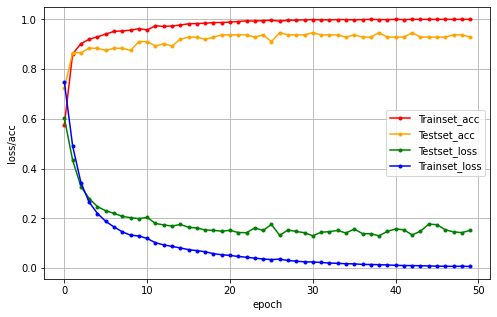

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
acc= Dens_history.history['accuracy']
val_acc= Dens_history.history['val_accuracy']
y_vloss = Dens_history.history['val_loss']
y_loss = Dens_history.history['loss']

x_len = np.arange(len(y_loss))  

plt.figure(figsize=(8, 5))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="orange", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="green", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
prediction = m.predict(test_images)

4/4 [==============================] - 4s 729ms/step


In [ ]:
def acc(number_1):
  for i in prediction[number_1]:
    if i>=0.5:
      ansewer=i*100
    else:
      ansewer=(1-i)*100
  return round(ansewer, 1)

acc(5)

99.9

번호를 입력하세요 : 9
예측률 :  100.0 %
predict proba: [0.99999917]


###brown avocado

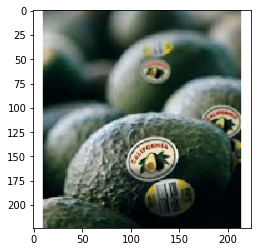

In [ ]:
# from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
def printmd(string):
   # Print with Markdowns    
    display(Markdown(string))
class_dictionary = {'brown avocado' : 0, 
                    'bright green avocado': 1}
IMAGE_SIZE    = (224, 224)
number_1 = int(input("번호를 입력하세요 : ")) # 10, 50, 100
test_image = image.load_img(test_df.iloc[number_1, 0]
                            ,target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.);

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
#prediction = m.predict(test_image)

if prediction[number_1] >= 0.5: # 0.5로 조정햇을때, 미착용에 대한 오차가 많다...
  print("예측률 : ",acc(number_1),"%")
  print('predict proba: {}'.format(prediction[number_1]))
  printmd(f'###brown avocado')
else:
  print("예측률 : ",acc(number_1),"%")
  print('predict proba: {}'.format(1-prediction[number_1]))
  printmd(f'###bright avocado')


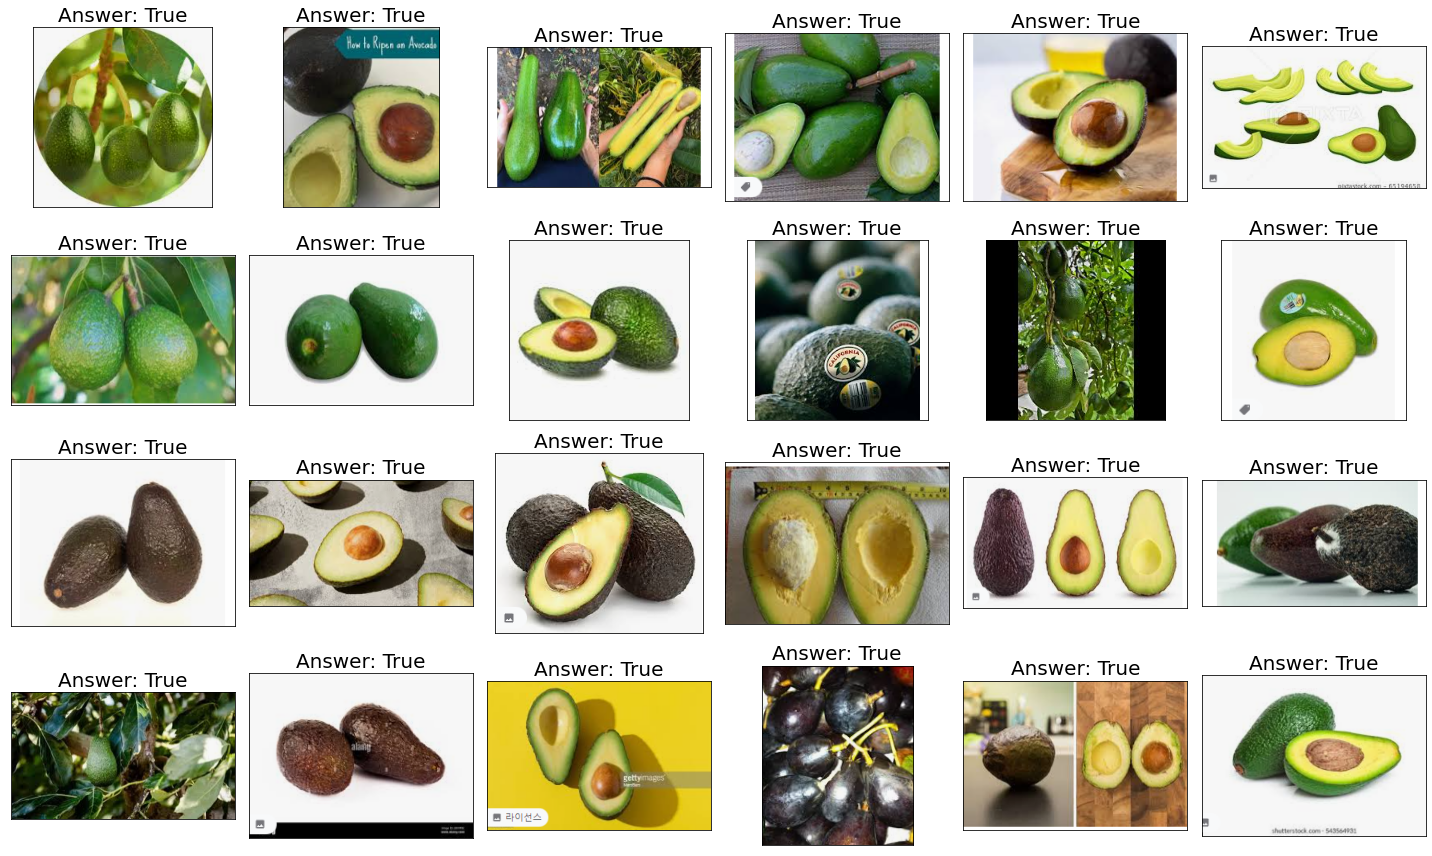

In [ ]:
# Display picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    if prediction[i] >= 0.5: # 0.5로 조정햇을때, 미착용에 대한 오차가 많다...
      if test_df.Label.iloc[i]=='brown avocado':
        answer = "True"
      else:
        answer = "False"
    else:
      if test_df.Label.iloc[i]=='bright green avocado':
        answer = "True"
      else:
        answer = "False"
    ax.set_title(f"Answer: %s" % answer, fontsize = 20)
plt.tight_layout()
plt.show()